Data Analysis Interview Challenge

This is your chance to wow us with creative and rigorous solutions! Please include your code at
the end of your submission, or in a separate file. We also accept incomplete solutions.

Part 1 ‐ Exploratory data analysis
The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15minute time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.

In [3]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt
import os
import io 

# Show plots inline
%matplotlib inline

In [4]:
#getting the data
logins = pd.read_json('/Users/ofrioren/GIT/ultimate_challenge (1)/logins.json')
logins

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21
...,...
93137,1970-04-13 18:50:19
93138,1970-04-13 18:43:56
93139,1970-04-13 18:54:02
93140,1970-04-13 18:57:38


In [5]:
logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [6]:
logins.describe()

,login_time
count,93142
mean,1970-02-26 19:09:39.779648278
min,1970-01-01 20:12:16
25%,1970-02-04 10:37:19.750000
50%,1970-03-01 06:33:05.500000
75%,1970-03-22 04:01:10.750000
max,1970-04-13 18:57:38


In [7]:
#Aggregate these login counts based on 15minute time intervals
logins['time_quarterhr'] = logins['login_time'].dt.floor('15min')
logins

,login_time,time_quarterhr
0,1970-01-01 20:13:18,1970-01-01 20:00:00
1,1970-01-01 20:16:10,1970-01-01 20:15:00
2,1970-01-01 20:16:37,1970-01-01 20:15:00
3,1970-01-01 20:16:36,1970-01-01 20:15:00
4,1970-01-01 20:26:21,1970-01-01 20:15:00
...,...,...
93137,1970-04-13 18:50:19,1970-04-13 18:45:00
93138,1970-04-13 18:43:56,1970-04-13 18:30:00
93139,1970-04-13 18:54:02,1970-04-13 18:45:00
93140,1970-04-13 18:57:38,1970-04-13 18:45:00


Visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.

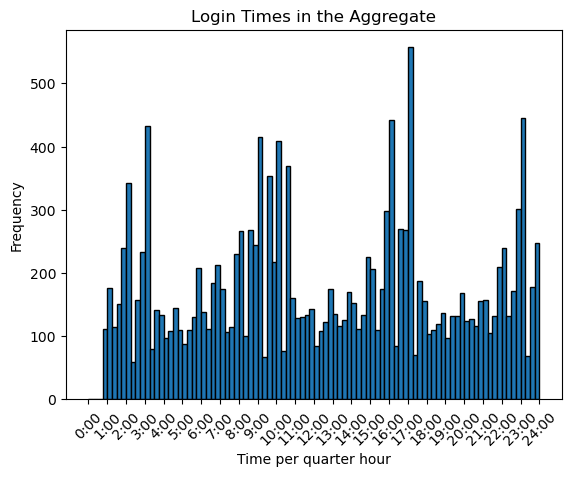

In [9]:
#I'm going to make a histogram for the total frequencies of this four month interval.

plt.hist(logins['time_quarterhr'], bins=96, range=(0, 24), edgecolor='black') 
plt.xlabel('Time per quarter hour')
plt.ylabel('Frequency')
plt.title('Login Times in the Aggregate')
plt.xticks(
    ticks=[i for i in range(0, 25)], 
    labels=[f"{i}:00" for i in range(0, 25)], 
    rotation=45
)
plt.show()

In [10]:
#I am going to make a column for the frequency of logins.

# Calculate frequency counts for each unique time_quarterhr
logins['frequency'] = logins['time_quarterhr'].map(logins['time_quarterhr'].value_counts())

logins

,login_time,time_quarterhr,frequency
0,1970-01-01 20:13:18,1970-01-01 20:00:00,2
1,1970-01-01 20:16:10,1970-01-01 20:15:00,6
2,1970-01-01 20:16:37,1970-01-01 20:15:00,6
3,1970-01-01 20:16:36,1970-01-01 20:15:00,6
4,1970-01-01 20:26:21,1970-01-01 20:15:00,6
...,...,...,...
93137,1970-04-13 18:50:19,1970-04-13 18:45:00,6
93138,1970-04-13 18:43:56,1970-04-13 18:30:00,7
93139,1970-04-13 18:54:02,1970-04-13 18:45:00,6
93140,1970-04-13 18:57:38,1970-04-13 18:45:00,6


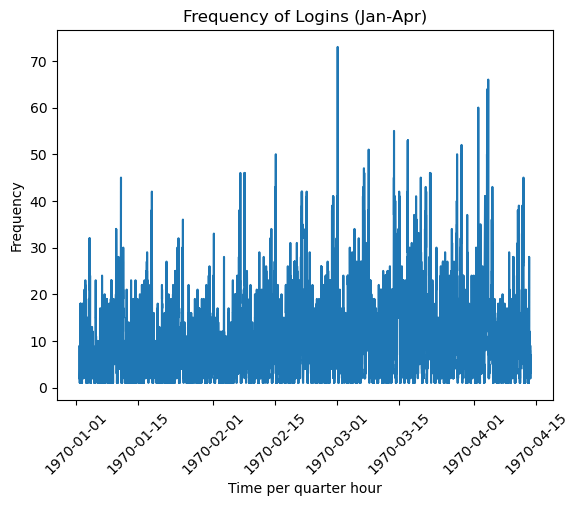

In [11]:
#Next I'll plot it 

plt.plot(logins['time_quarterhr'], logins['frequency']) 
plt.xlabel('Time per quarter hour')
plt.ylabel('Frequency')
plt.title('Frequency of Logins (Jan-Apr)')
plt.xticks(rotation=45)

plt.show()

<Figure size 1000x600 with 0 Axes>

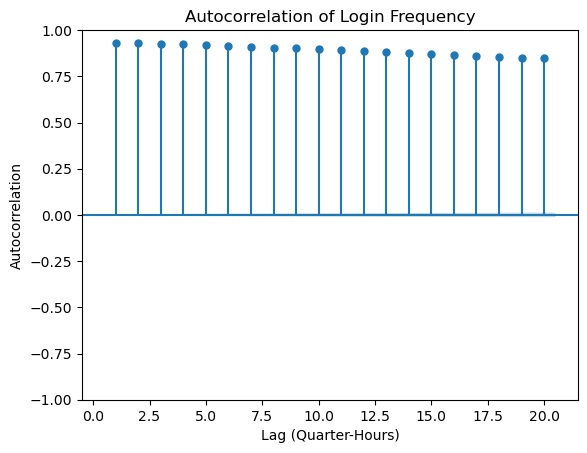

In [12]:
#I can see that there is a sudden spike in frequency of cab requests around March first and another into April.
#Let's check to see if the data is stationary. 

from statsmodels.graphics.tsaplots import plot_acf

X = logins['frequency']

plt.figure(figsize=(10, 6))
plot_acf(X, lags=20, alpha=0.5, zero=False)
plt.title('Autocorrelation of Login Frequency')
plt.xlabel('Lag (Quarter-Hours)')
plt.ylabel('Autocorrelation')
plt.show()

In [13]:
# Resample to daily mean and create a new column
# Calculate frequency counts for each day
logins['time_daily'] = logins['login_time'].dt.floor('D')
logins['daily_frequency'] = logins['time_daily'].map(logins['time_daily'].value_counts())

logins

,login_time,time_quarterhr,frequency,time_daily,daily_frequency
0,1970-01-01 20:13:18,1970-01-01 20:00:00,2,1970-01-01,112
1,1970-01-01 20:16:10,1970-01-01 20:15:00,6,1970-01-01,112
2,1970-01-01 20:16:37,1970-01-01 20:15:00,6,1970-01-01,112
3,1970-01-01 20:16:36,1970-01-01 20:15:00,6,1970-01-01,112
4,1970-01-01 20:26:21,1970-01-01 20:15:00,6,1970-01-01,112
...,...,...,...,...,...
93137,1970-04-13 18:50:19,1970-04-13 18:45:00,6,1970-04-13,395
93138,1970-04-13 18:43:56,1970-04-13 18:30:00,7,1970-04-13,395
93139,1970-04-13 18:54:02,1970-04-13 18:45:00,6,1970-04-13,395
93140,1970-04-13 18:57:38,1970-04-13 18:45:00,6,1970-04-13,395


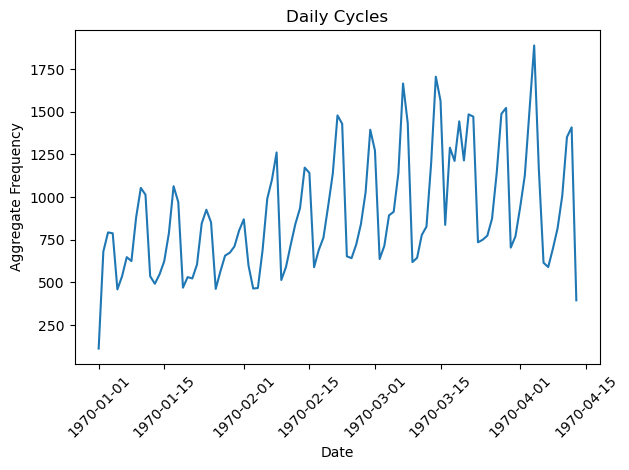

In [14]:
# Plot the daily data
plt.plot(logins['time_daily'], logins['daily_frequency'])
plt.title('Daily Cycles')
plt.xlabel('Date')
plt.ylabel('Aggregate Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

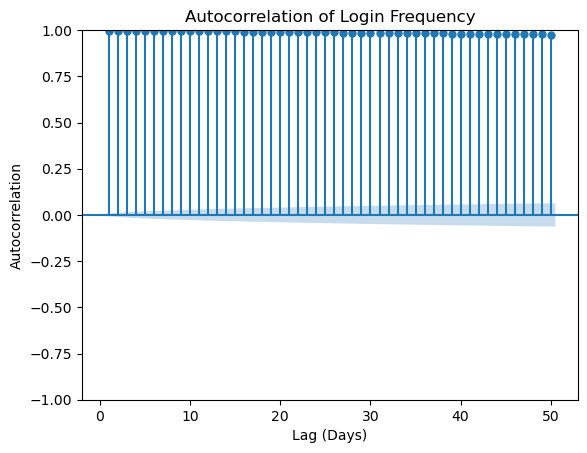

In [15]:
plot_acf(logins['daily_frequency'], zero=False)
plt.title('Autocorrelation of Login Frequency')
plt.xlabel('Lag (Days)')
plt.ylabel('Autocorrelation')
plt.show()

In [16]:
from statsmodels.tsa.stattools import adfuller

results_qthr = adfuller(logins['frequency'])
results_qthr

(-15.013282128655003,
 1.0478757980046263e-27,
 39,
 93102,
 {'1%': -3.4304202399551675,
  '5%': -2.8615710449343905,
  '10%': -2.566786524136659},
 481749.87031498307)

In [17]:
results_daily = adfuller(logins['daily_frequency'])
results_daily

(-4.636168325004324,
 0.00011072933316405726,
 25,
 93116,
 {'1%': -3.4304202293942923,
  '5%': -2.8615710402667083,
  '10%': -2.5667865216522046},
 825223.5241394215)

I can reject the null hypothesis that the results are a random walk with certainty at the alpha<0.01 level. I will have to adjust these data for seasonality in fifteen minute cycles. I will first try to do this by using a seasonal arima for modeling, but in case this option is not available, I can difference the data.

In [19]:
#load the other file
ultimate = pd.read_json('/Users/ofrioren/GIT/ultimate_challenge (1)/ultimate_data_challenge.json')
ultimate

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,2014-01-25,5.0,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2
49996,Astapor,1,2014-01-24,NaN,1.00,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0
49997,Winterfell,0,2014-01-31,5.0,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0
49998,Astapor,2,2014-01-14,3.0,1.00,2014-01-15,iPhone,0.0,False,100.0,4.58,3.5


In [20]:
ultimate.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [21]:
ultimate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [22]:
ultimate.isna().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

I still have some wrangling to do because of all these nans, but it will depend on what I want to find from this data. I would also normally merge these files into a single dataframe.

Part 2 ‐ Experiment and metrics design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.

1) What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?
2) Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on:
a) how you will implement the experiment
b) what statistical test(s) you will conduct to verify the significance of the
observation
c) how you would interpret the results and provide recommendations to the city
operations team along with any caveats.
Note: The two cities of Gotham and Metropolis are not in the provided dataset; however, you do
not need this information to answer Part 2.

1) What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?

I would choose a metric that indicates profit, or revenue minus cost. Given the data as it is, it would be something like the total sum of (surge_pct+1)*avg_distance of ride. I would need to collect data on the total costs of paying the tolls to subtract it from the profits calculated to produce a value for approximate profit.

2) Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on:
a) how you will implement the experiment
b) what statistical test(s) you will conduct to verify the significance of the
observation
c) how you would interpret the results and provide recommendations to the city
operations team along with any caveats.

I would calculate data to approximate the changes to revenue. I would keep collecting the data already provided and use it to approximate profits prior to the change. Next, I would collect data on the cost of paying for the tolls. I would calculate the new revenue by taking the sum of the surge prices, surge percentage plus one) times the average distance and then subtract the cost of the tolls in order to calculate proft. I could then compare the previous profits to current profits to see which is greater.I would also have to account for the other users, not within their first thirty days after signing up.

Part 3 ‐ Predictive modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.

We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed
description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the challenge.

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active in
their 6th month on the system. Discuss why you chose your approach, what alternatives
you considered, and any concerns you have. How valid is your model? Include any key
indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its long term rider retention (again, a few sentences will suffice).

In [28]:
#EDA of user data
ultimate.isna().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

In [29]:
#fill or replace nas
mean_ratingof = np.mean(ultimate.avg_rating_of_driver)
ultimate['avg_rating_of_driver'] = ultimate.avg_rating_of_driver.fillna(mean_ratingof)

ultimate['phone'] = ultimate.phone.fillna(0)

mean_ratingby = np.mean(ultimate.avg_rating_by_driver)
ultimate['avg_rating_by_driver'] = ultimate.avg_rating_by_driver.fillna(mean_ratingby)
ultimate.isna().sum()

city                      0
trips_in_first_30_days    0
signup_date               0
avg_rating_of_driver      0
avg_surge                 0
last_trip_date            0
phone                     0
surge_pct                 0
ultimate_black_user       0
weekday_pct               0
avg_dist                  0
avg_rating_by_driver      0
dtype: int64

In [30]:
ultimate['last_trip_date'].describe()

count          50000
unique           182
top       2014-06-29
freq            2036
Name: last_trip_date, dtype: object

In [31]:
ultimate['last_trip_date'].max()

'2014-07-01'

In [32]:
#As the latest trip was 07/01 I will use all trips within the month of June to qualify as retained because it is not
#stated when the data were collected.
ultimate['retained'] = (ultimate['last_trip_date'] > '2014-06-01').astype(int)

# Display the first few rows
print(ultimate[['last_trip_date', 'retained']])

      last_trip_date  retained
0         2014-06-17         1
1         2014-05-05         0
2         2014-01-07         0
3         2014-06-29         1
4         2014-03-15         0
...              ...       ...
49995     2014-06-05         1
49996     2014-01-25         0
49997     2014-05-22         0
49998     2014-01-15         0
49999     2014-04-20         0

[50000 rows x 2 columns]


In [33]:
#calculating the total percent of riders who are retained
total_retained = ultimate.retained.sum()/(50000)
print(total_retained)

0.3662


In [34]:
ultimate

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained
0,King's Landing,4,2014-01-25,4.700000,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.000000,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.300000,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.600000,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.400000,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,2014-01-25,5.000000,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2,1
49996,Astapor,1,2014-01-24,4.601559,1.00,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0,0
49997,Winterfell,0,2014-01-31,5.000000,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0,0
49998,Astapor,2,2014-01-14,3.000000,1.00,2014-01-15,iPhone,0.0,False,100.0,4.58,3.5,0


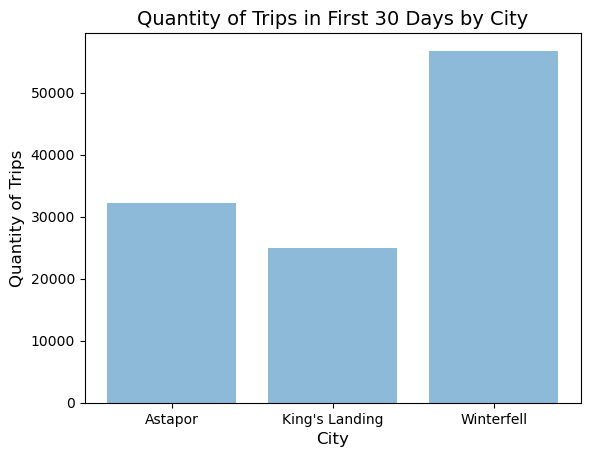

In [35]:
#Only about thirty-seven percent of users were retained, which seems pretty low. Let's look at what their usage is.

# Group the data by 'city' and sum 'trips_in_first_30_days'
city_trips = ultimate.groupby('city')['trips_in_first_30_days'].sum()

# Create a bar plot
plt.bar(city_trips.index, city_trips.values, alpha=0.5)
plt.title("Quantity of Trips in First 30 Days by City", fontsize=14)
plt.xlabel('City', fontsize=12)
plt.ylabel('Quantity of Trips', fontsize=12)
plt.show()

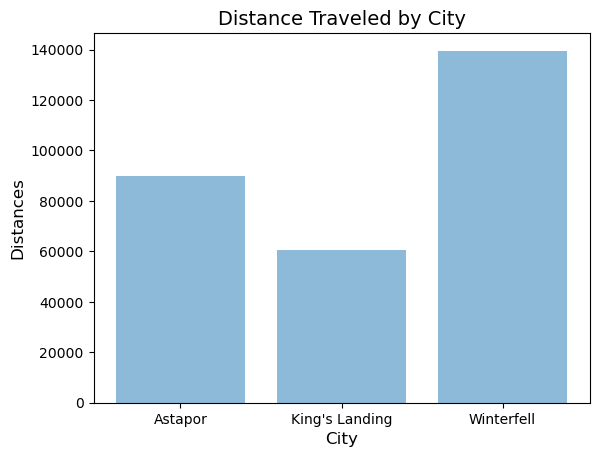

In [36]:
#How far did they go?

# Group the data by 'city' and sum 'avg_dist'
city_trips = ultimate.groupby('city')['avg_dist'].sum()

# Create a bar plot
plt.bar(city_trips.index, city_trips.values, alpha=0.5)
plt.title("Distance Traveled by City", fontsize=14)
plt.xlabel('City', fontsize=12)
plt.ylabel('Distances', fontsize=12)
plt.show()

In [37]:
#It appears that %37 of users were retained. People from Winterfell traveled the most and the farthest.

2. Build a predictive model to help Ultimate determine whether or not a user will be active in
their 6th month on the system. Discuss why you chose your approach, what alternatives
you considered, and any concerns you have. How valid is your model? Include any key
indicators of model performance.

In [86]:
#Modelling

#imports
import sklearn.model_selection
from sklearn.preprocessing import OneHotEncoder as OHE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.decomposition import PCA

In [41]:
ultimate

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained
0,King's Landing,4,2014-01-25,4.700000,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.000000,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.300000,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.600000,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.400000,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,2014-01-25,5.000000,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2,1
49996,Astapor,1,2014-01-24,4.601559,1.00,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0,0
49997,Winterfell,0,2014-01-31,5.000000,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0,0
49998,Astapor,2,2014-01-14,3.000000,1.00,2014-01-15,iPhone,0.0,False,100.0,4.58,3.5,0


In [43]:
categorical_columns = ['city', 'phone', 'ultimate_black_user']
df_dummies = pd.get_dummies(ultimate[categorical_columns], drop_first=True) 
ultimate_categorical = pd.concat([ultimate, df_dummies], axis=1).drop(categorical_columns, axis=1)
ultimate_categorical = ultimate_categorical.map(lambda x: 1 if x is True else (0 if x is False else x))
ultimate_categorical

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,retained,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone
0,4,2014-01-25,4.700000,1.10,2014-06-17,15.4,46.2,3.67,5.0,1,1,0,0,1
1,0,2014-01-29,5.000000,1.00,2014-05-05,0.0,50.0,8.26,5.0,0,0,0,1,0
2,3,2014-01-06,4.300000,1.00,2014-01-07,0.0,100.0,0.77,5.0,0,0,0,0,1
3,9,2014-01-10,4.600000,1.14,2014-06-29,20.0,80.0,2.36,4.9,1,1,0,0,1
4,14,2014-01-27,4.400000,1.19,2014-03-15,11.8,82.4,3.13,4.9,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0,2014-01-25,5.000000,1.00,2014-06-05,0.0,100.0,5.63,4.2,1,1,0,0,1
49996,1,2014-01-24,4.601559,1.00,2014-01-25,0.0,0.0,0.00,4.0,0,0,0,0,1
49997,0,2014-01-31,5.000000,1.00,2014-05-22,0.0,100.0,3.86,5.0,0,0,1,1,0
49998,2,2014-01-14,3.000000,1.00,2014-01-15,0.0,100.0,4.58,3.5,0,0,0,0,1


In [47]:
ultimate_categorical = ultimate_categorical.drop(['signup_date', 'last_trip_date'], axis=1)
ultimate_categorical

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,retained,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone
0,4,4.700000,1.10,15.4,46.2,3.67,5.0,1,1,0,0,1
1,0,5.000000,1.00,0.0,50.0,8.26,5.0,0,0,0,1,0
2,3,4.300000,1.00,0.0,100.0,0.77,5.0,0,0,0,0,1
3,9,4.600000,1.14,20.0,80.0,2.36,4.9,1,1,0,0,1
4,14,4.400000,1.19,11.8,82.4,3.13,4.9,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0,5.000000,1.00,0.0,100.0,5.63,4.2,1,1,0,0,1
49996,1,4.601559,1.00,0.0,0.0,0.00,4.0,0,0,0,0,1
49997,0,5.000000,1.00,0.0,100.0,3.86,5.0,0,0,1,1,0
49998,2,3.000000,1.00,0.0,100.0,4.58,3.5,0,0,0,0,1


In [84]:
#In order to see how the data collected might indicate retention I'll do an OLS model. In case there is a very low 
#R-squared value, I can do a PCA transformation, but to get an idea of important features, I'll start with OLS.

# Split the data into features (X) and target (y)
y = ultimate_categorical['retained']
X = ultimate_categorical.drop(['retained'], axis=1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Instantiate and train the LinearRegression model
lm = LinearRegression()
lm.fit(X_train, y_train)

# Make predictions using the trained model
predict = lm.predict(X_test)  

#Output table of coefficients per variable

coefficients = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
print(coefficients)


                        Coefficient
trips_in_first_30_days     0.023504
avg_rating_of_driver      -0.011221
avg_surge                 -0.027493
surge_pct                  0.000348
weekday_pct                0.000200
avg_dist                  -0.005524
avg_rating_by_driver      -0.026308
city_King's Landing        0.357052
city_Winterfell            0.088885
phone_Android             -0.126844
phone_iPhone               0.088102


In [ ]:
#It looks like the strongest positive indicator for retention is being from Kings's landing. Interestingly, the 
#strongest negative indicator of retention is having an android phone. Now for the sake of accuracy in prediction, 
#but not legibility, I'll do a PCA and logistic regression.

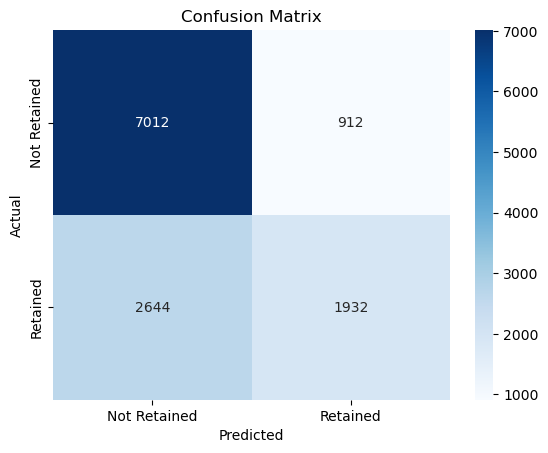

In [90]:
# Logistic Regression with PCA

# Split the data into features (X) and target (y)
y = ultimate_categorical['retained']
X = ultimate_categorical.drop(['retained'], axis=1)

# Standardize the features before PCA 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.25, random_state=42)

# Instantiate and train the LogisticRegression model
lm = LogisticRegression(max_iter=1000)  # Increased max_iter to ensure convergence
lm.fit(X_train, y_train)

# Make predictions using the trained model
predict = lm.predict(X_test)  

# Generate the confusion matrix
cm = confusion_matrix(y_test, predict)  # No need for rounding here, as predict is already 0/1

# Plot the confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Retained', 'Retained'], 
            yticklabels=['Not Retained', 'Retained'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [92]:
lm.score(X_test, y_test)

0.71552

In [94]:
# Calculate accuracy
accuracy = accuracy_score(y_test, predict.round())

# Calculate F1 score
f1 = f1_score(y_test, predict.round())

# Generate classification report
report = classification_report(y_test, predict.round())

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Classification Report:")
print(report)

Accuracy: 0.7155
F1 Score: 0.5208
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.88      0.80      7924
           1       0.68      0.42      0.52      4576

    accuracy                           0.72     12500
   macro avg       0.70      0.65      0.66     12500
weighted avg       0.71      0.72      0.70     12500



In [ ]:
3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its long term rider retention (again, a few sentences will suffice).

Ultimate might specifically direct advertising to iPhone users in King's Landing. Another option would be to limit surge pricing, but this would decrease profits for the company.